###PACOTES E CONJUNTO DE DADOS 

In [ ]:
# Importação das bibliotecas a serem utilizadas na análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o conjunto de dados
df = pd.read_csv('athlete_events.csv')
df.reset_index()

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### PRÉ-PROCESSAMENTO E ANÁLISE SISTEMÁTICA

####RENOMEANDO ALGUMAS COLUNAS A SEREM UTILIZADAS PARA ANÁLISE 

In [ ]:
# Rename() para renomear colunas do df
df = df.rename(columns={'Age': 'Idade', 'Name': 'Nome', 'Weight': 'Peso', 
                        'Sex':'Sexo', 'Games': 'Jogos', 'Year': 'Ano', 'Sport': 'Esporte',
                        'Medal':'Medalha', 'Season':'Estação', 'Height': 'Altura', 'Time':'Tempo'})

#### SOBRE OS DADOS

Número de observações, número de variáveis:

In [ ]:
df.shape

(271116, 15)

Tipos das variáveis:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Nome     271116 non-null  object 
 2   Sexo     271116 non-null  object 
 3   Idade    261642 non-null  float64
 4   Altura   210945 non-null  float64
 5   Peso     208241 non-null  float64
 6   Team     271116 non-null  object 
 7   NOC      271116 non-null  object 
 8   Jogos    271116 non-null  object 
 9   Ano      271116 non-null  int64  
 10  Estação  271116 non-null  object 
 11  City     271116 non-null  object 
 12  Esporte  271116 non-null  object 
 13  Event    271116 non-null  object 
 14  Medalha  39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Algumas estatísticas das variaveis quantitativas contínuas:

In [ ]:
df[['Idade', 'Altura', 'Peso']].describe()

,Idade,Altura,Peso
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


####FILTRANDO ATLETAS BRASILEIROS 

In [ ]:
# Criando um novo df apenas com dados de atletas brasileiros 
atletas_brasileiros_df = df.loc[df['NOC'] == 'BRA']

Info. variáveis contínuas:

In [ ]:
atletas_brasileiros_df[['Idade', 'Altura', 'Peso']].describe()

,Idade,Altura,Peso
count,3788.000000,3365.000000,3188.000000
mean,25.606125,177.637147,72.549875
std,6.025611,11.798370,14.823224
min,13.000000,133.000000,30.000000
25%,21.000000,170.000000,63.000000
50%,25.000000,178.000000,72.000000
75%,29.000000,185.000000,82.000000
max,56.000000,217.000000,160.000000


####FILTRANDO ATLETAS BRASILEIROS QUE PARTICIPARAM NOS JOGOS DE VERÃO

In [ ]:
# Criando um novo df apenas com dados de atletas brasileiros que participaram nos esportes de Verão 
atletas_brasileiros_verao = atletas_brasileiros_df[atletas_brasileiros_df['Estação'] == 'Summer']

####FILTRANDO APENAS AS MULHERES BRASILEIRAS QUE PARTICIPARAM DAS OLIMPÍADAS DE VERÃO

In [ ]:
# Df de mulheres brasileiras que participaram nos esportes de Verão 
atletas_brasileiras_verao = atletas_brasileiros_verao.loc[(atletas_brasileiros_verao["Sexo"] == "F")]

Info. variáveis contínuas:

In [ ]:
atletas_brasileiras_verao[['Idade', 'Altura', 'Peso']].describe()

,Idade,Altura,Peso
count,1127.000000,1059.000000,1048.000000
mean,24.642413,169.037771,60.802481
std,5.669940,10.988501,11.142993
min,13.000000,133.000000,30.000000
25%,20.000000,162.000000,54.000000
50%,24.000000,169.000000,60.000000
75%,29.000000,176.000000,67.000000
max,54.000000,200.000000,110.000000


####DIVIDINDO A PARTICIPAÇÃO DE BRASILEIROS EM CADA ESPORTE, POR GÊNERO

In [ ]:
# Agrupar os dados por esporte e sexo e contar a quantidade de atletas em cada grupo
atletas_por_esporte_sexo = atletas_brasileiros_verao.groupby(['Esporte', 'Sexo'])['Nome'].count().reset_index(name='Total')
atletas_por_esporte_sexo

,Esporte,Sexo,Total
0,Archery,F,7
1,Archery,M,14
2,Art Competitions,M,1
3,Athletics,F,156
4,Athletics,M,363
...,...,...,...
60,Water Polo,M,83
61,Weightlifting,F,4
62,Weightlifting,M,21
63,Wrestling,F,6


####PARTICIPACAO DE ATLETAS BRASILEIROS NOS JOGOS OLIMPICOS AO LONGO DA HISTORIA, POR SEXO

In [ ]:
participantes = atletas_brasileiros_df.groupby(['Ano', 'Sexo'])['Esporte'].count().reset_index(name='Total')
participantes

,Ano,Sexo,Total
0,1900,M,3
1,1920,M,38
2,1924,M,18
3,1932,F,3
4,1932,M,64
5,1936,F,8
6,1936,M,86
7,1948,F,22
8,1948,M,83
9,1952,F,8


####MULHERES MEDALHISTAS

In [ ]:
mulheres_medalhistas_df = atletas_brasileiras_verao[(atletas_brasileiras_verao['Medalha'].isna()==False)]

####PRIMEIRA MULHER BRASILEIRA A PARTICIPAR DAS OLIMPÍADAS

In [ ]:
# Filtrando a primeira mulher brasileira a participar das Olimpíadas e informações
primeira_mulher = atletas_brasileiras_verao.sort_values(by='Ano').head(3)
primeira_mulher

,ID,Nome,Sexo,Idade,Altura,Peso,Team,NOC,Jogos,Ano,Estação,City,Esporte,Event,Medalha
136660,68718,Maria Emma Hulda Lenk Zigler,F,17.0,168.0,NaN,Brazil,BRA,1932 Summer,1932,Summer,Los Angeles,Swimming,Swimming Women's 100 metres Freestyle,NaN
136661,68718,Maria Emma Hulda Lenk Zigler,F,17.0,168.0,NaN,Brazil,BRA,1932 Summer,1932,Summer,Los Angeles,Swimming,Swimming Women's 100 metres Backstroke,NaN
136662,68718,Maria Emma Hulda Lenk Zigler,F,17.0,168.0,NaN,Brazil,BRA,1932 Summer,1932,Summer,Los Angeles,Swimming,Swimming Women's 200 metres Breaststroke,NaN


####PRIMEIRA MULHER BRASILEIRA A GANHAR UMA MEDALHA 

In [ ]:
primeira_medalha = atletas_brasileiras_verao.loc[(atletas_brasileiras_verao['Medalha'].isna()==False)].sort_values('Ano')
primeira_medalha = primeira_medalha[(primeira_medalha['Ano']==min(primeira_medalha['Ano']))]
primeira_medalha

,ID,Nome,Sexo,Idade,Altura,Peso,Team,NOC,Jogos,Ano,Estação,City,Esporte,Event,Medalha
202453,101690,Mnica Rodrigues,F,28.0,NaN,NaN,Brazil-2,BRA,1996 Summer,1996,Summer,Atlanta,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,Silver
149187,74833,"Mrcia Regina ""Mrcia Fu"" Cunha",F,26.0,185.0,80.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Women's Volleyball,Bronze
164151,82395,Ana Beatriz Moser,F,27.0,185.0,70.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Women's Volleyball,Bronze
183392,92176,Maria Paula Gonalves da Silva,F,34.0,174.0,60.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
96064,48638,Hilma Aparecida Caldeira,F,24.0,182.0,74.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Women's Volleyball,Bronze
204295,102571,Roseli do Carmo Gustavo,F,24.0,180.0,69.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
42469,21909,Cludia Maria Pastor,F,25.0,192.0,84.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
209232,105049,Adriana Ramos Samuel,F,30.0,178.0,65.0,Brazil-2,BRA,1996 Summer,1996,Summer,Atlanta,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,Silver
41940,21615,Cntia Silva dos Santos,F,21.0,195.0,83.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
28160,14601,"Maria Anglica ""Branca"" Gonalves da Silva",F,30.0,170.0,68.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver


As primeiras medalhas brasileiras conquistadas por atletas femininas vinharam simultaneamente em 3 esportes, nas olimpiadas de Atlanta em 1996.

####RANKING DE ESPORTES COM O MAIOR NUMERO DE MEDALHAS FEMININAS

In [ ]:
# filtrando mulheres medalhistas:
medalhistas = atletas_brasileiras_verao[(atletas_brasileiras_verao['Medalha'].isna()==False)]

# selecionando variaveis:
medalhistas = medalhistas[['Sexo', 'NOC', 'Ano', 'Esporte', 'Medalha']]

# retirando linhas duplicadas:
medalhistas = medalhistas.drop_duplicates()

# agrupando:
ranking = medalhistas.groupby(['Esporte'])

# contando os valores:
ranking = ranking['Medalha'].count().reset_index()

# ordenando e pegando os 5 primeiros:
ranking = ranking.sort_values(by='Medalha', ascending=False).head(5)

# filtrando os esportes do ranking entre os medalhistas:
medalhas = medalhistas[(medalhistas['Esporte'].isin(ranking['Esporte']))]

# contando quantas medalhas de ouro, prata e bronze cada esporte do ranking tem
medalhas = medalhas[['Esporte', 'Medalha']].groupby(['Esporte']).value_counts().reset_index(name='Total')

medalhas

,Esporte,Medalha,Total
0,Basketball,Bronze,1
1,Basketball,Silver,1
2,Beach Volleyball,Silver,4
3,Beach Volleyball,Bronze,2
4,Beach Volleyball,Gold,1
5,Football,Silver,2
6,Judo,Bronze,3
7,Judo,Gold,2
8,Volleyball,Bronze,2
9,Volleyball,Gold,2


####MAIORES MEDALHISTAS BRASILEIRAS

In [ ]:
# Agrupar o nome das atletas mulheres com a soma de medalhas
medalhas_por_brasileira= mulheres_medalhistas_df.groupby(['Nome', 'Esporte'])['Medalha'].count().reset_index(name='Total')

# Filtrar apenas as atletas que tem medalhas e ordenar de maneira decrescente
medalhistas_brasileiras= medalhas_por_brasileira[medalhas_por_brasileira['Total'] > 0]
medalhistas_brasileiras = medalhistas_brasileiras.sort_values(by='Total', ascending=False)
mulheres_medalhistas_df[mulheres_medalhistas_df['Nome'] == medalhistas_brasileiras['Nome'].iloc[0]]

,ID,Nome,Sexo,Idade,Altura,Peso,Team,NOC,Jogos,Ano,Estação,City,Esporte,Event,Medalha
70731,36017,"Hlia ""Fofo"" Rogrio de Souza Pinto",F,26.0,173.0,63.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Women's Volleyball,Bronze
70732,36017,"Hlia ""Fofo"" Rogrio de Souza Pinto",F,30.0,173.0,63.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Volleyball,Volleyball Women's Volleyball,Bronze
70734,36017,"Hlia ""Fofo"" Rogrio de Souza Pinto",F,38.0,173.0,63.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Volleyball,Volleyball Women's Volleyball,Gold


#### MEDIDAS DE IDADE, PESO E ALTURA

In [ ]:
# calculos da média, mínimo e máximo de idade, peso e altura
media_idade_mulheres = atletas_brasileiras_verao['Idade'].mean()
print('Média de idade das mulheres:', media_idade_mulheres)

min_idade_mulheres = atletas_brasileiras_verao['Idade'].min()
print('Idade mínima das mulheres:', min_idade_mulheres)

max_idade_mulheres = atletas_brasileiras_verao['Idade'].max()
print('Idade máxima das mulheres:', max_idade_mulheres)

Média de idade das mulheres: 24.642413487133982
Idade mínima das mulheres: 13.0
Idade máxima das mulheres: 54.0


In [ ]:
media_altura_mulheres = atletas_brasileiras_verao['Peso'].mean()
print('Média de peso das mulheres:', media_altura_mulheres)

min_altura_mulheres = atletas_brasileiras_verao['Peso'].min()
print('Peso mínimo das mulheres:', min_altura_mulheres)

max_altura_mulheres = atletas_brasileiras_verao['Peso'].max()
print('Peso máximo das mulheres:', max_altura_mulheres)

Média de peso das mulheres: 60.80248091603053
Peso mínimo das mulheres: 30.0
Peso máximo das mulheres: 110.0


In [ ]:
media_altura_mulheres = atletas_brasileiras_verao['Altura'].mean()
print('Média de altura das mulheres:', media_altura_mulheres)

min_altura_mulheres = atletas_brasileiras_verao['Altura'].min()
print('Altura mínima das mulheres:', min_altura_mulheres)

max_altura_mulheres = atletas_brasileiras_verao['Altura'].max()
print('Altura máxima das mulheres:', max_altura_mulheres)


Média de altura das mulheres: 169.0377714825307
Altura mínima das mulheres: 133.0
Altura máxima das mulheres: 200.0


#### CORRELAÇÕES ENTRE ATLETAS

#####Para a análise das correlações, retiramos NAs das variaveis idade, peso e altura:

In [ ]:
atletas_brasileiras_verao.shape

(1127, 15)

In [ ]:
atletas_brasileiras_verao = atletas_brasileiras_verao[(atletas_brasileiras_verao['Idade'].isna()==False) &
                                                      (atletas_brasileiras_verao['Altura'].isna()==False) &
                                                      (atletas_brasileiras_verao['Peso'].isna()==False)]

atletas_brasileiras_verao.shape

(1048, 15)

Separando atletas medalhistas e não medalhistas

In [ ]:
# filtrando atletas dos esportes do ranking:
atletas = atletas_brasileiras_verao[(atletas_brasileiras_verao['Esporte'].isin(ranking['Esporte']))]

nao_medalhistas = atletas[(atletas['Medalha'].isna()==True)]

# criando outro dataset apenas com as atletas medalhistas:
medalhistas = atletas[(atletas['Medalha'].isna()==False)]

atletas.shape, medalhistas.shape, nao_medalhistas.shape

((352, 15), (125, 15), (227, 15))

MEDALHISTAS:

##### Análise gráfica de atletas medalhistas + não medalhistas

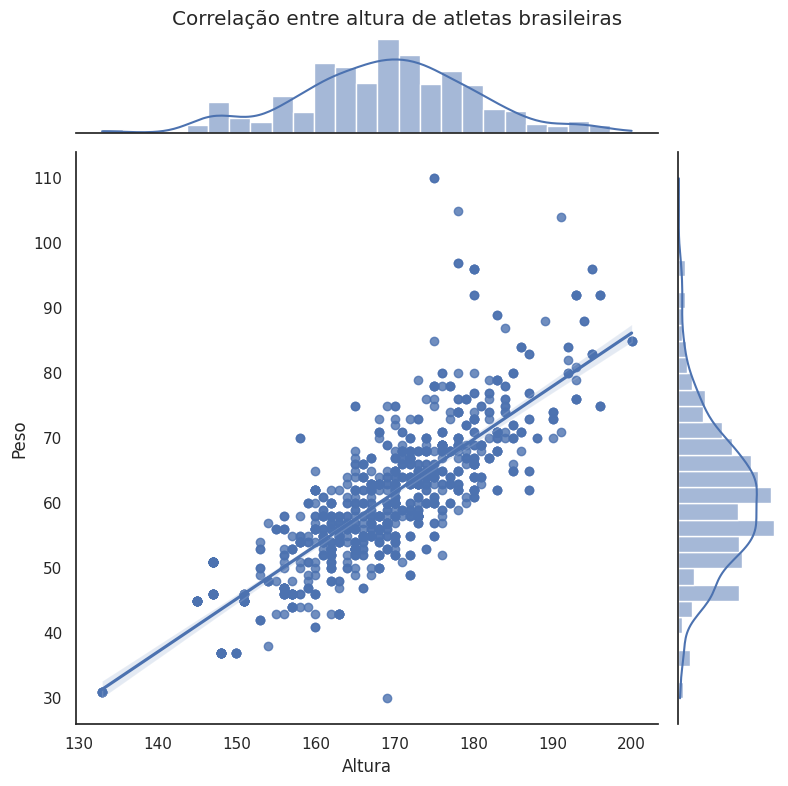

In [ ]:
sns.set(style="white", color_codes=True)
x=  atletas_brasileiras_verao['Altura']
y= atletas_brasileiras_verao['Peso']
sns.jointplot(x="Altura", y="Peso", data=atletas_brasileiras_verao, kind='reg', height=8)
plt.subplots_adjust(top=0.95)
plt.suptitle('Correlação entre altura de atletas brasileiras')
plt.show()

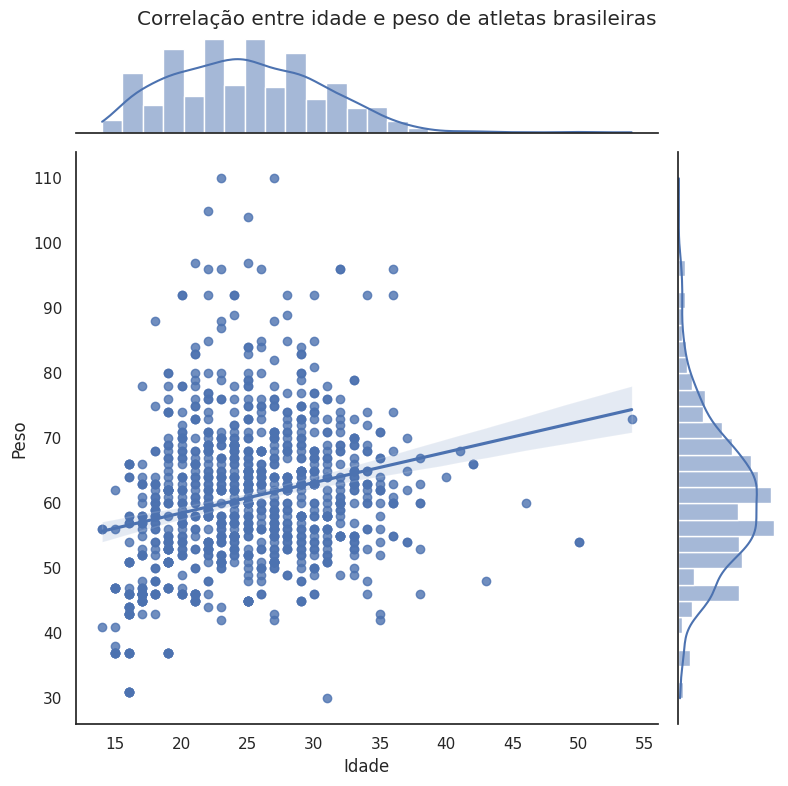

In [ ]:
sns.set(style="white", color_codes=True)
x=  atletas_brasileiras_verao['Idade']
y= atletas_brasileiras_verao['Peso']
sns.jointplot(x="Idade", y="Peso", data=atletas_brasileiras_verao, kind='reg', height=8)
plt.subplots_adjust(top=0.95)
plt.suptitle('Correlação entre idade e peso de atletas brasileiras')
plt.show()

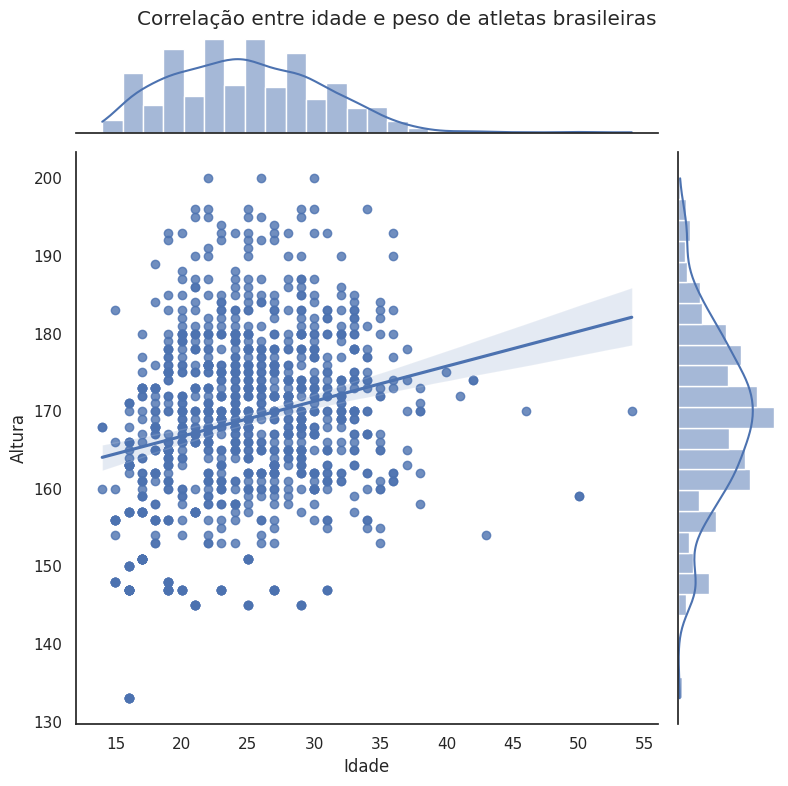

In [ ]:
sns.set(style="white", color_codes=True)
x=  atletas_brasileiras_verao['Idade']
y= atletas_brasileiras_verao['Altura']
sns.jointplot(x="Idade", y="Altura", data=atletas_brasileiras_verao, kind='reg', height=8)
plt.subplots_adjust(top=0.95)
plt.suptitle('Correlação entre idade e peso de atletas brasileiras')
plt.show()

#####Correlação nos esportes em geral entre medalhistas e não medalhistas

**A altura influencia no peso?**

In [ ]:
altura_peso = medalhistas[['Altura', 'Peso']]
correlacao = altura_peso.corr()
print(f"A correlação entre altura e peso das mulheres brasileiras é: {correlacao.iloc[0,1]}")
print("Há uma forte correlação positiva entre as variáveis, indicando que quanto maior a altura, maior é o peso das mulheres")

A correlação entre altura e peso das mulheres brasileiras é: 0.8420010217427183
Há uma forte correlação positiva entre as variáveis, indicando que quanto maior a altura, maior é o peso das mulheres


**A idade influencia na altura?**

In [ ]:
altura_peso = medalhistas[['Idade', 'Altura']]
correlacao = altura_peso.corr()
print(f"A correlação entre altura e peso das mulheres brasileiras é: {correlacao.iloc[0,1]}")
print("Há uma fraca correlação positiva entre as variáveis, indicando que a altura é fracamente influenciada pelo aumento da idade.")

A correlação entre altura e peso das mulheres brasileiras é: -0.03747132284318471
Há uma fraca correlação positiva entre as variáveis, indicando que a altura é fracamente influenciada pelo aumento da idade.


**A idade influencia no peso?**

In [ ]:
altura_peso = medalhistas[['Idade', 'Peso']]
correlacao = altura_peso.corr()
print(f"A correlação entre altura e peso das mulheres brasileiras é: {correlacao.iloc[0,1]}")
print("Há uma fraca correlação positiva entre as variáveis, indicando que o peso é fracamente influenciado pelo aumento da idade.")

A correlação entre altura e peso das mulheres brasileiras é: -0.18107852960559634
Há uma fraca correlação positiva entre as variáveis, indicando que o peso é fracamente influenciado pelo aumento da idade.


NÃO MEDALHISTAS:

**A altura influencia no peso?**

In [ ]:
altura_peso = nao_medalhistas[['Altura', 'Peso']]
correlacao = altura_peso.corr()
print(f"A correlação entre altura e peso das mulheres brasileiras é: {correlacao.iloc[0,1]}")
print("Há uma forte correlação positiva entre as variáveis, indicando que quanto maior a altura, maior é o peso das mulheres")

A correlação entre altura e peso das mulheres brasileiras é: 0.7010350876621576
Há uma forte correlação positiva entre as variáveis, indicando que quanto maior a altura, maior é o peso das mulheres


**A idade influencia na altura?**

In [ ]:
altura_peso = nao_medalhistas[['Idade', 'Altura']]
correlacao = altura_peso.corr()
print(f"A correlação entre altura e peso das mulheres brasileiras é: {correlacao.iloc[0,1]}")
print("Há uma fraca correlação positiva entre as variáveis, indicando que a altura é fracamente influenciada pelo aumento da idade.")

A correlação entre altura e peso das mulheres brasileiras é: 0.07619215039006162
Há uma fraca correlação positiva entre as variáveis, indicando que a altura é fracamente influenciada pelo aumento da idade.


**A idade influencia no peso?**

In [ ]:
altura_peso = nao_medalhistas[['Idade', 'Peso']]
correlacao = altura_peso.corr()
print(f"A correlação entre altura e peso das mulheres brasileiras é: {correlacao.iloc[0,1]}")
print("Há uma fraca correlação positiva entre as variáveis, indicando que o peso é fracamente influenciado pelo aumento da idade.")

A correlação entre altura e peso das mulheres brasileiras é: 0.03776241413449938
Há uma fraca correlação positiva entre as variáveis, indicando que o peso é fracamente influenciado pelo aumento da idade.


##### Observando essa correlação em alguns esportes específicos

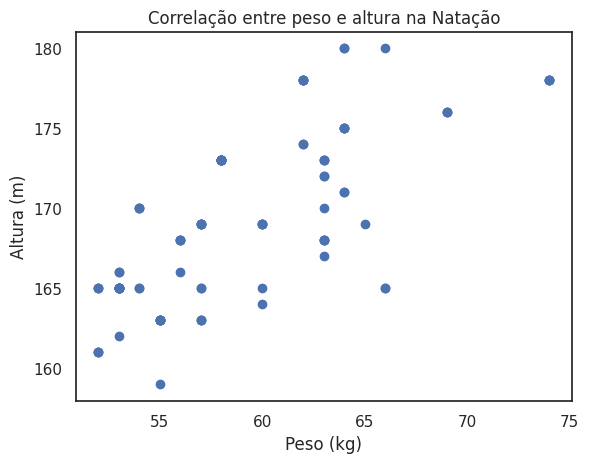

In [ ]:
# CORRELAÇÃO da altura e peso das Nadadoras Brasileiras de Verão 

natacao = atletas_brasileiras_verao.loc[atletas_brasileiras_verao['Esporte'] == 'Swimming']
correlacao = natacao['Altura'].corr(natacao['Peso'])

plt.scatter(natacao['Peso'], natacao['Altura'])
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.title('Correlação entre peso e altura na Natação')
plt.show()



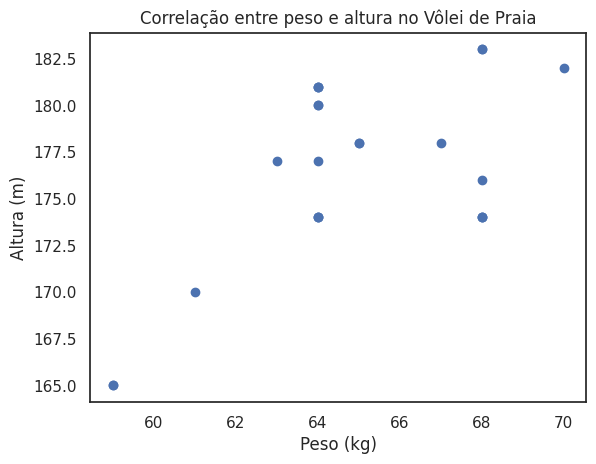

In [ ]:
# CORRELAÇÃO da altura e peso das Atletistas Brasileiras de Verão 

atletismo = atletas_brasileiras_verao.loc[atletas_brasileiras_verao['Esporte'] == 'Beach Volleyball']
correlacao = atletismo['Altura'].corr(atletismo['Peso'])

plt.scatter(atletismo['Peso'], atletismo['Altura'])
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.title('Correlação entre peso e altura no Vôlei de Praia')
plt.show()


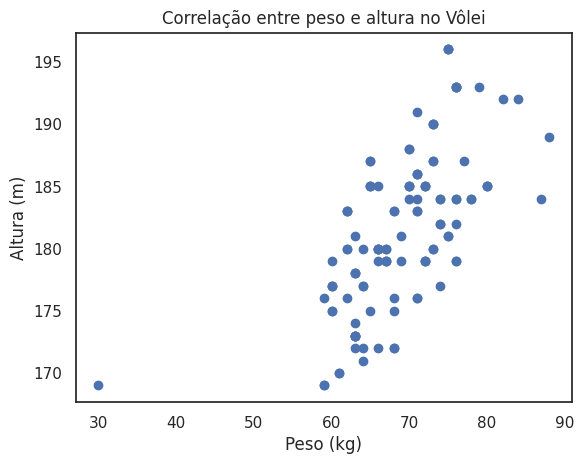

In [ ]:
# CORRELAÇÃO da altura e peso das atletas de Volei do Brasl no Verão 

volei = atletas_brasileiras_verao.loc[atletas_brasileiras_verao['Esporte'] == 'Volleyball']
correlacao = volei['Altura'].corr(volei['Peso'])

plt.scatter(volei['Peso'], volei['Altura'])
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.title('Correlação entre peso e altura no Vôlei')
plt.show()


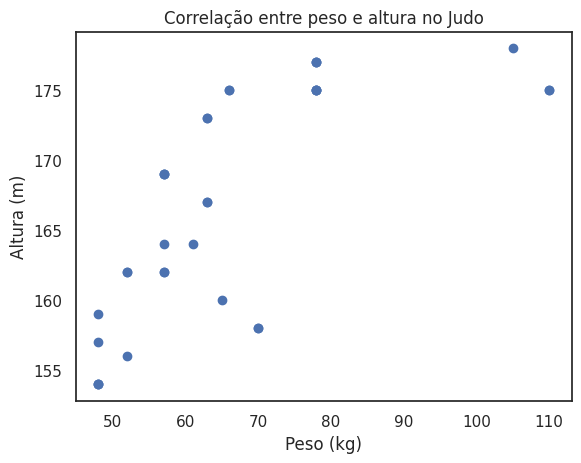

In [ ]:
# CORRELAÇÃO da altura e peso das Ginastas Brasileiras no Verão 

Gymnastics = atletas_brasileiras_verao.loc[atletas_brasileiras_verao['Esporte'] == 'Judo']
correlacao = Gymnastics['Altura'].corr(Gymnastics['Peso'])

plt.scatter(Gymnastics['Peso'], Gymnastics['Altura'])
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.title('Correlação entre peso e altura no Judo')
plt.show()


In [ ]:

# Agrupa os dados por esporte e calcula as correlações entre peso e altura dentro de cada grupo
correlacoes_por_esporte = atletas_brasileiras_verao.groupby('Esporte')[['Peso', 'Altura']].corr().iloc[::2,-1]

# Imprime as correlações
print(correlacoes_por_esporte)



Esporte                    
Archery                Peso    0.739150
Athletics              Peso    0.713523
Badminton              Peso         NaN
Basketball             Peso    0.765933
Beach Volleyball       Peso    0.612163
Boxing                 Peso    0.940137
Canoeing               Peso    1.000000
Cycling                Peso    0.150272
Diving                 Peso   -0.925605
Equestrianism          Peso   -0.765652
Fencing                Peso    0.629620
Football               Peso    0.796363
Golf                   Peso    1.000000
Gymnastics             Peso    0.272351
Handball               Peso    0.815391
Judo                   Peso    0.716031
Modern Pentathlon      Peso    1.000000
Rhythmic Gymnastics    Peso    0.832670
Rowing                 Peso    0.604567
Rugby Sevens           Peso    0.862032
Sailing                Peso    0.740360
Shooting               Peso    0.670583
Swimming               Peso    0.718841
Synchronized Swimming  Peso    0.639168
Table Tennis

In [ ]:

# Criando um novo DataFrame com as colunas de interesse
df_corr = atletas_brasileiras_verao[['Esporte', 'Peso', 'Altura']]

# Agrupando os dados por esporte e calculando a média de peso e altura
df_corr = df_corr.groupby('Esporte').mean().reset_index()


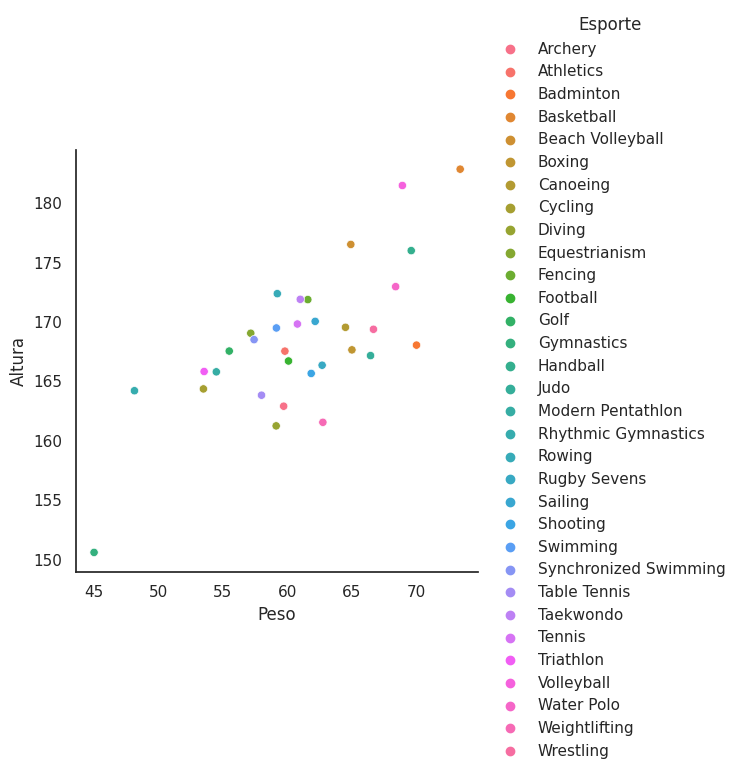

In [ ]:
import seaborn as sns
# Plotando o gráfico de dispersão das correlações de peso e altura com os esportes
sns.pairplot(df_corr, x_vars=['Peso'], y_vars=['Altura'], hue='Esporte', height=5)


#####Observando como as correlações se comportam entre os 5 esportes com o maior numero de medalhas femininas

Criando um dataset com todas as atletas dos 5 esportes e outro apenas com as medalhistas:

Calculando as correlações em cada esporte entre atletas NAO MEDALHISTAS:

- **Basquete:**

In [ ]:
cor_basquete = atletas[(atletas['Esporte']=='Basketball')]
cor_basquete[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.765933,-0.166713
Peso,0.765933,1.000000,-0.093613
Idade,-0.166713,-0.093613,1.000000


- **Judô:**

In [ ]:
cor_judo = atletas[(atletas['Esporte']=='Judo')]
cor_judo[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.716031,0.082416
Peso,0.716031,1.000000,0.114476
Idade,0.082416,0.114476,1.000000


- **Futebol:**

In [ ]:
cor_futebol = atletas[(atletas['Esporte']=='Football')]
cor_futebol[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.796363,-0.039621
Peso,0.796363,1.000000,-0.162217
Idade,-0.039621,-0.162217,1.000000


- **Voleibol:**

In [ ]:
cor_voleibol = atletas[(atletas['Esporte']=='Volleyball')]
cor_voleibol[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.645085,-0.015759
Peso,0.645085,1.000000,-0.086589
Idade,-0.015759,-0.086589,1.000000


- **Voleibol de praia:**

In [ ]:
cor_volei_praia = atletas[(atletas['Esporte']=='Beach Volleyball')]
cor_volei_praia[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.612163,0.257961
Peso,0.612163,1.000000,0.178014
Idade,0.257961,0.178014,1.000000


Calculando a correlações em cada esporte entre atletas MEDALHISTAS:

- **Basquete:**

In [ ]:
Mcor_basquete = medalhistas[(medalhistas['Esporte']=='Basketball')]
Mcor_basquete[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.824419,-0.228328
Peso,0.824419,1.000000,-0.419848
Idade,-0.228328,-0.419848,1.000000


- **Judô:**

In [ ]:
Mcor_judo = medalhistas[(medalhistas['Esporte']=='Judo')]
Mcor_judo[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.941173,0.212925
Peso,0.941173,1.000000,0.115663
Idade,0.212925,0.115663,1.000000


- **Futebol:**

In [ ]:
Mcor_futebol = medalhistas[(medalhistas['Esporte']=='Football')]
Mcor_futebol[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.829987,-0.315385
Peso,0.829987,1.000000,-0.325402
Idade,-0.315385,-0.325402,1.000000


- **Voleibol:**

In [ ]:
Mcor_voleibol = medalhistas[(medalhistas['Esporte']=='Volleyball')]
Mcor_voleibol[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.663791,-0.485357
Peso,0.663791,1.000000,-0.461315
Idade,-0.485357,-0.461315,1.000000


- **Voleibol de praia:**

In [ ]:
Mcor_volei_praia = medalhistas[(medalhistas['Esporte']=='Beach Volleyball')]
Mcor_volei_praia[['Altura', 'Peso', 'Idade']].corr()

,Altura,Peso,Idade
Altura,1.000000,0.791316,0.307827
Peso,0.791316,1.000000,0.137275
Idade,0.307827,0.137275,1.000000


#####Calculando estatísticas descritivas 

NAO MEDALHISTAS

In [ ]:
nao_medalhistas.groupby(['Esporte'])['Peso'].agg(media=('mean'),
                                                   moda=(lambda x: pd.Series.mode(x).iat[0]), 
                                                   mediana=('median'), 
                                                   max=('max'), 
                                                   min=('min'))

,media,moda,mediana,max,min
Esporte,,,,,
Basketball,74.192308,65.0,69.5,104.0,60.0
Beach Volleyball,66.000000,64.0,66.0,68.0,64.0
Football,59.742424,56.0,58.0,76.0,49.0
Judo,66.931034,78.0,63.0,110.0,48.0
Volleyball,67.457143,63.0,67.0,88.0,30.0


In [ ]:
nao_medalhistas.groupby(['Esporte'])['Altura'].agg(media=('mean'),
                                                   moda=(lambda x: pd.Series.mode(x).iat[0]), 
                                                   mediana=('median'), 
                                                   max=('max'), 
                                                   min=('min'))

,media,moda,mediana,max,min
Esporte,,,,,
Basketball,182.557692,170.0,182.0,200.0,170.0
Beach Volleyball,178.400000,174.0,179.0,183.0,174.0
Football,166.500000,162.0,166.5,180.0,153.0
Judo,166.931034,175.0,167.0,178.0,154.0
Volleyball,180.071429,180.0,180.0,196.0,169.0


In [ ]:
nao_medalhistas.groupby(['Esporte'])['Idade'].agg(media=('mean'),
                                                   moda=(lambda x: pd.Series.mode(x).iat[0]), 
                                                   mediana=('median'), 
                                                   max=('max'), 
                                                   min=('min'))

,media,moda,mediana,max,min
Esporte,,,,,
Basketball,27.423077,29.0,28.0,37.0,19.0
Beach Volleyball,30.000000,26.0,30.0,36.0,25.0
Football,25.969697,22.0,26.0,40.0,16.0
Judo,23.655172,26.0,24.0,31.0,16.0
Volleyball,23.971429,19.0,22.5,35.0,15.0


MEDALHISTAS

In [ ]:
medalhistas.groupby(['Esporte'])['Peso'].agg(media=('mean'),
                                                   moda=(lambda x: pd.Series.mode(x).iat[0]), 
                                                   mediana=('median'), 
                                                   max=('max'), 
                                                   min=('min'))

,media,moda,mediana,max,min
Esporte,,,,,
Basketball,71.625000,61.0,68.0,92.0,60.0
Beach Volleyball,64.076923,64.0,64.0,70.0,59.0
Football,60.742857,56.0,60.0,76.0,51.0
Judo,63.600000,57.0,57.0,78.0,48.0
Volleyball,71.020833,76.0,72.0,87.0,59.0


In [ ]:
medalhistas.groupby(['Esporte'])['Altura'].agg(media=('mean'),
                                                   moda=(lambda x: pd.Series.mode(x).iat[0]), 
                                                   mediana=('median'), 
                                                   max=('max'), 
                                                   min=('min'))

,media,moda,mediana,max,min
Esporte,,,,,
Basketball,183.375000,170.0,182.0,200.0,170.0
Beach Volleyball,175.000000,174.0,177.0,182.0,165.0
Football,166.971429,162.0,167.0,180.0,155.0
Judo,168.200000,177.0,169.0,177.0,154.0
Volleyball,183.437500,185.0,184.0,196.0,169.0


In [ ]:
medalhistas.groupby(['Esporte'])['Idade'].agg(media=('mean'),
                                                   moda=(lambda x: pd.Series.mode(x).iat[0]), 
                                                   mediana=('median'), 
                                                   max=('max'), 
                                                   min=('min'))

,media,moda,mediana,max,min
Esporte,,,,,
Basketball,26.083333,21.0,25.0,36.0,20.0
Beach Volleyball,30.230769,27.0,30.0,35.0,23.0
Football,24.285714,22.0,23.0,34.0,18.0
Judo,22.200000,20.0,22.0,25.0,20.0
Volleyball,26.604167,24.0,26.0,38.0,20.0


### EXPORTANDO DATASETS PARA VISUALIZAÇÃO DE DADOS

In [ ]:
participantes.to_csv("participantes.csv")
ranking.to_csv("ranking.csv")
medalhas.to_csv("medalhas.csv")
medalhistas.to_csv("medalhistas.csv")
nao_medalhistas.to_csv("nao_medalhistas.csv")